## Sistema simplificado:

## $$ \frac{dx_1}{dt} = -\mu x_1^2 + \frac{(1-\sigma)a x_1 x_3}{1+\alpha x_1 + \gamma x_3}$$

## $$ \frac{dx_3}{dt} = x_3(r_3 - \mu_3x_3)+\frac{bx_1 x_3}{1+\alpha x_1 +\gamma x_3} $$

## Importações

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from matplotlib import MatplotlibDeprecationWarning
warnings.filterwarnings("ignore", category=MatplotlibDeprecationWarning)
plt.style.use('seaborn-bright')

## Variáveis

In [2]:
X1_INICIAL = 1
X3_INICIAL = 1
NSTEPS = 500
TFINAL = 10

mu, mu3, a, alfa, b, gama, r3, sigma,  = 1,1,1,1,1,1,1,1
STEP = TFINAL/NSTEPS
x_1 = np.zeros(NSTEPS)
x_3 = np.zeros(NSTEPS)
dx_1 = np.zeros(NSTEPS)
dx_3 = np.zeros(NSTEPS)
x_1[0] = X1_INICIAL
x_3[0] = X3_INICIAL

In [13]:
def dx1(x1, x3):
    return -mu*x1**2 + ((1-sigma)*a*x1*x3)/(1+alfa*x1 + gama*x3)

def dx3(x1, x3):
    return x3*(r3 - mu3*x3) + (b*x1*x3)/(1+alfa*x1 + gama*x3)

In [15]:
t = np.linspace(0,TFINAL, NSTEPS)
for i in range(NSTEPS-1):
    dx_1[i] = dx1(x_1[i], x_3[i])
    dx_3[i] = dx3(x_1[i], x_3[i])
    x_1[i+1] = x_1[i] + STEP*dx_1[i]
    x_3[i+1] = x_3[i] + STEP*dx_3[i]

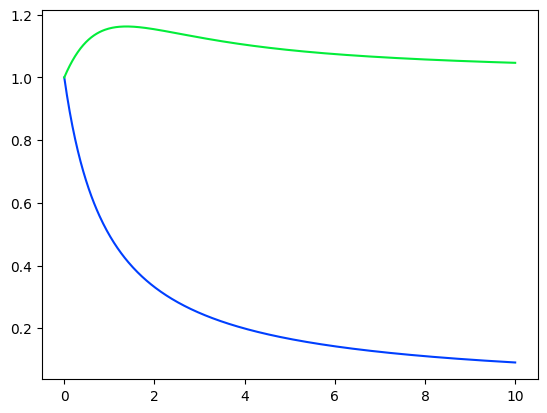

In [16]:
fig, ax = plt.subplots(1,1)
ax.plot(t, x_1)
ax.plot(t, x_3)